# Heart Disease

- | -
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

# Importando las librerías

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

from IPython.display import HTML

# Cargando los datos

In [283]:
trainx = pd.read_csv("./heart.csv")

In [284]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [285]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results <br>
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

In [286]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [287]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


<h3>Datos completos</h3>

In [288]:
print("NaNs")
print(trainx.isna().any().any())
print("------------------")
print("Nulls")
print(trainx.isnull().any().any())

NaNs
False
------------------
Nulls
False


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

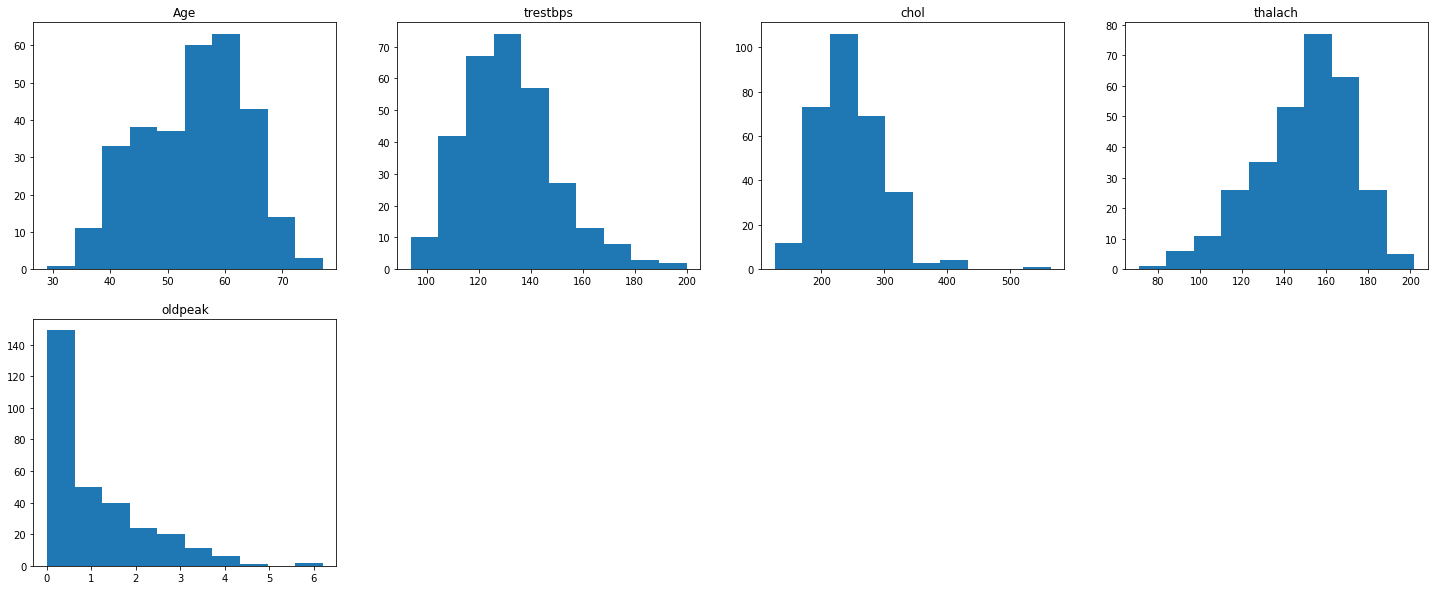

In [289]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Pasteles</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

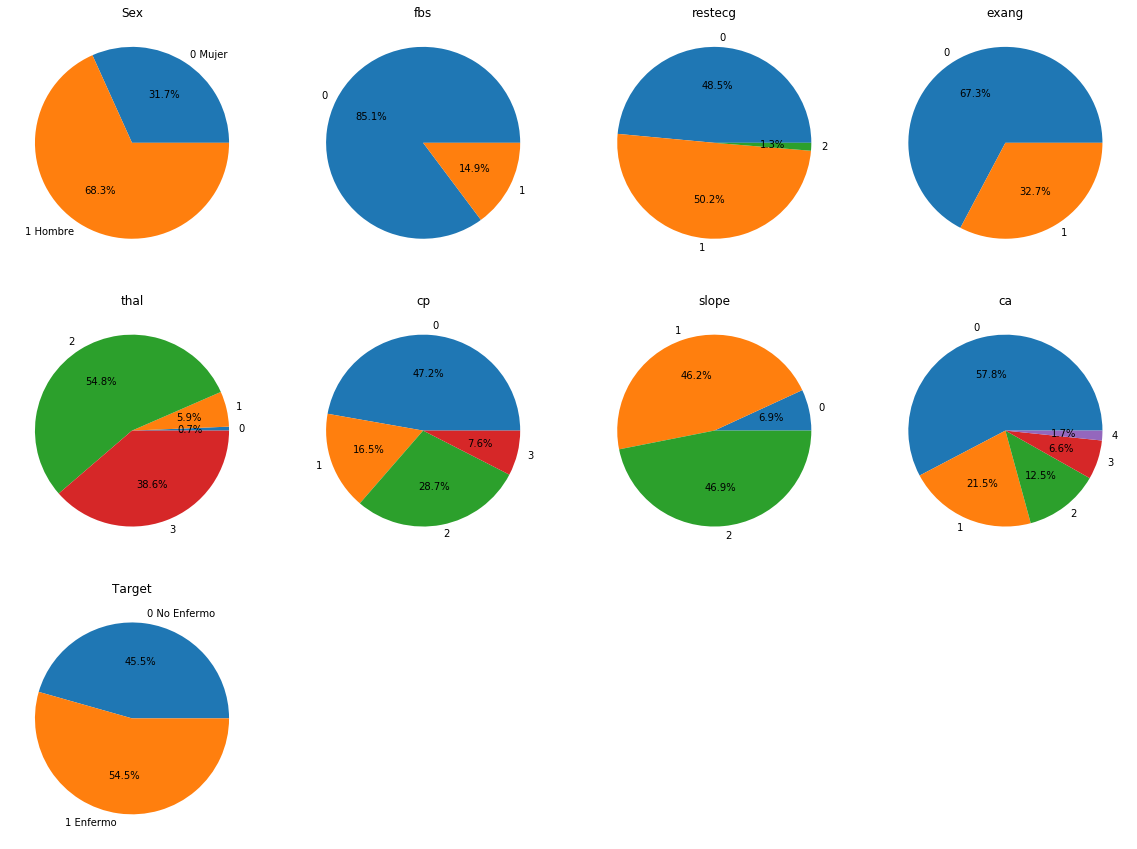

In [290]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0","1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Target')



# División del conjunto de datos
<h2>80% para entrenamiento y 20% para pruebas</h2>


In [324]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar y probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((242, 13), (242,))
((61, 13), (61,))


In [325]:
#Funcion auxiliar para la generacion de la grafica de la matriz de confusion 
def plot_confusion_matrix(cm,
                      

    target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('OrRd')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Árbol de decisión

In [326]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 3)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9338842975206612
Test: 0.7377049180327869


<h2>Matriz de confusión</h2>

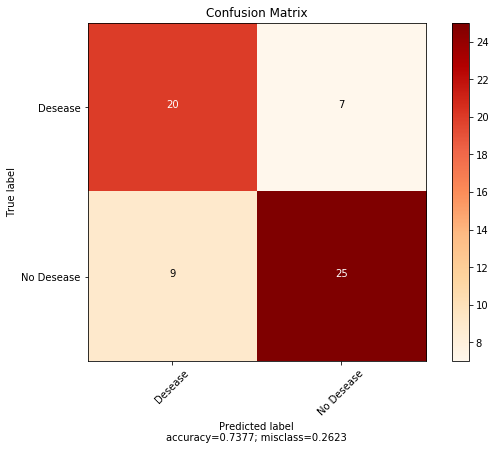

In [327]:
plot_confusion_matrix(cm = confusion_matrix(model1.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

# Gráfica de Importancias y Árbol de decisión


(array([0.11989306, 0.34173957, 0.03084085, 0.04207106, 0.02801466,
       0.06549095, 0.06201896, 0.        , 0.01970031, 0.10543315,
       0.02942886, 0.02735344, 0.12801514]), 0.8943894389438944)


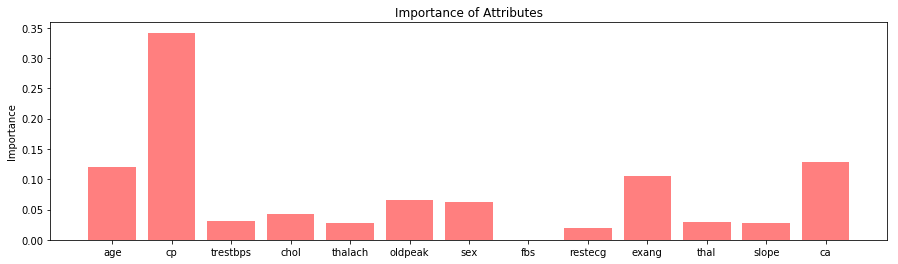

In [328]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

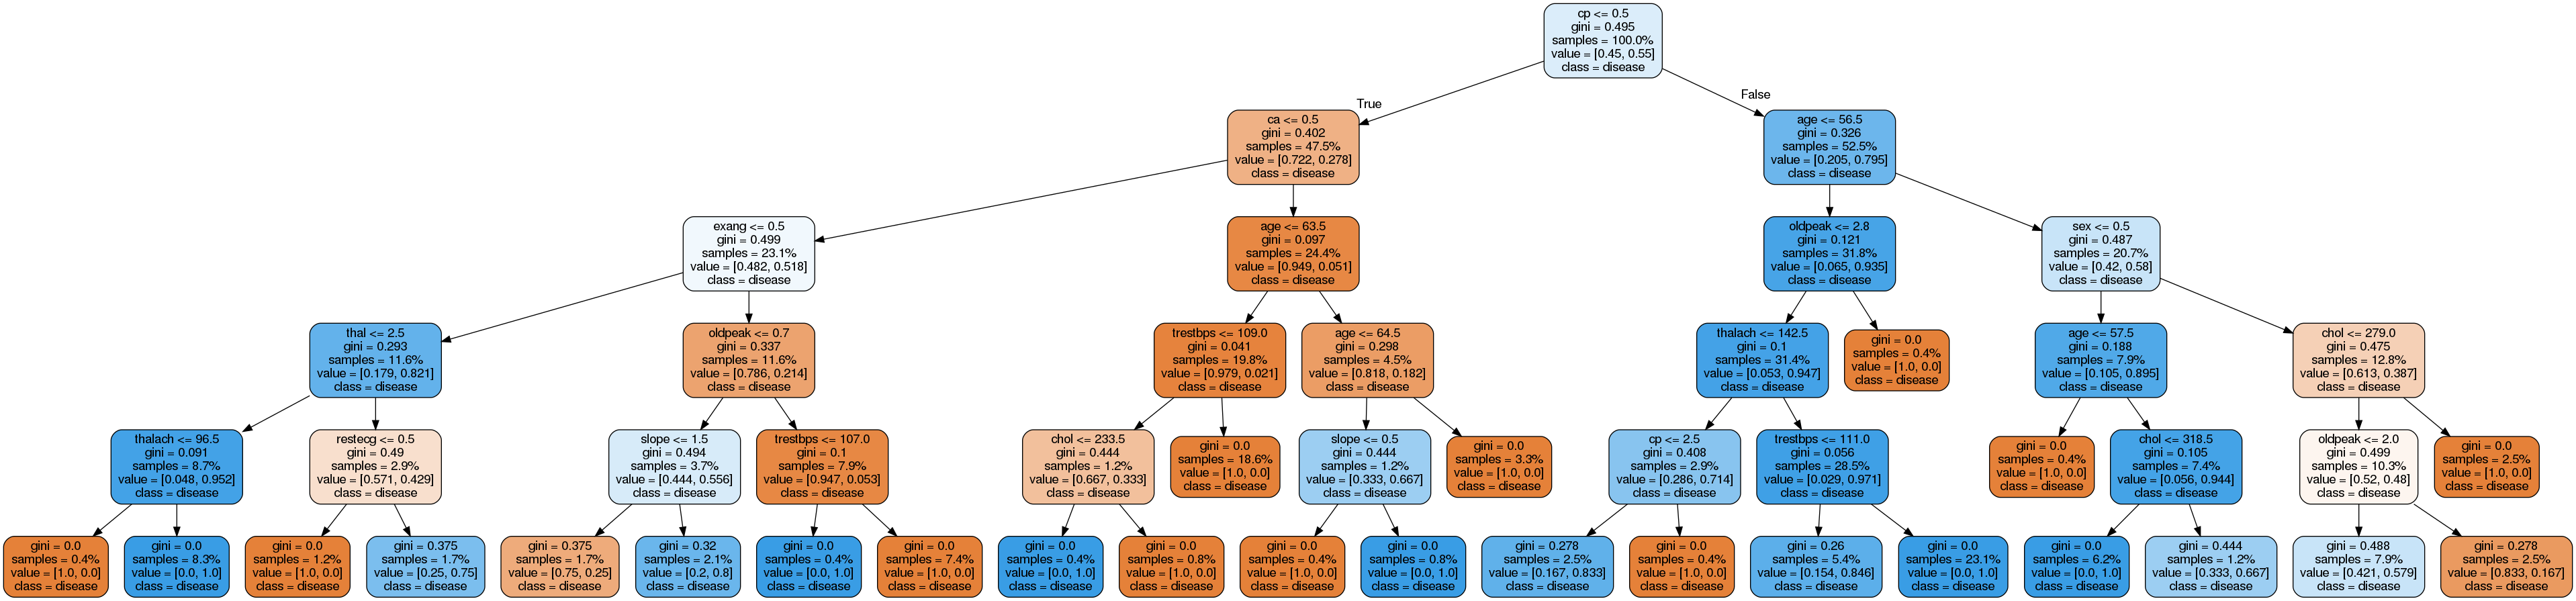

In [329]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


<h2>Interpretación</h2>

El arbol es algo muy facil de entender y graficar

# Naive Bayes

In [330]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.8388429752066116
Test: 0.7868852459016393


<h2>Matriz de confusión</h2>

In [331]:
confusion_matrix(model2.predict(testX), testY)

array([[24,  8],
       [ 5, 24]])

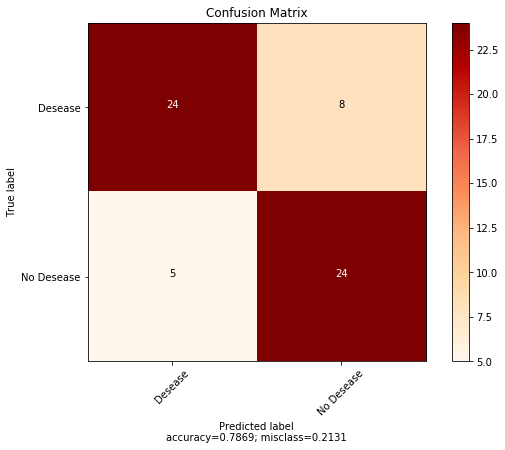

In [332]:
plot_confusion_matrix(cm = confusion_matrix(model2.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

<h2>Interpretación</h2>

# Red Neuronal

In [333]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='sgd', alpha=1e-3, activation = 'relu', max_iter=2000,
                     hidden_layer_sizes = (5, 5, 5, 5, 5), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

Iteration 1, loss = 0.82337539
Iteration 2, loss = 0.82252560
Iteration 3, loss = 0.82110933
Iteration 4, loss = 0.81923849
Iteration 5, loss = 0.81706214
Iteration 6, loss = 0.81466141
Iteration 7, loss = 0.81198199
Iteration 8, loss = 0.80919407
Iteration 9, loss = 0.80629460
Iteration 10, loss = 0.80323475
Iteration 11, loss = 0.80016596
Iteration 12, loss = 0.79703213
Iteration 13, loss = 0.79397938
Iteration 14, loss = 0.79091943
Iteration 15, loss = 0.78794061
Iteration 16, loss = 0.78496366
Iteration 17, loss = 0.78221804
Iteration 18, loss = 0.77924755
Iteration 19, loss = 0.77663082
Iteration 20, loss = 0.77386305
Iteration 21, loss = 0.77110185
Iteration 22, loss = 0.76851340
Iteration 23, loss = 0.76593961
Iteration 24, loss = 0.76333299
Iteration 25, loss = 0.76085603
Iteration 26, loss = 0.75845177
Iteration 27, loss = 0.75599387
Iteration 28, loss = 0.75378735
Iteration 29, loss = 0.75154759
Iteration 30, loss = 0.74930813
Iteration 31, loss = 0.74728969
Iteration 32, los

Iteration 340, loss = 0.60103354
Iteration 341, loss = 0.60047776
Iteration 342, loss = 0.59988209
Iteration 343, loss = 0.59937558
Iteration 344, loss = 0.59875525
Iteration 345, loss = 0.59816830
Iteration 346, loss = 0.59757263
Iteration 347, loss = 0.59700066
Iteration 348, loss = 0.59639071
Iteration 349, loss = 0.59577775
Iteration 350, loss = 0.59519368
Iteration 351, loss = 0.59458037
Iteration 352, loss = 0.59394671
Iteration 353, loss = 0.59335026
Iteration 354, loss = 0.59270803
Iteration 355, loss = 0.59209369
Iteration 356, loss = 0.59142547
Iteration 357, loss = 0.59080917
Iteration 358, loss = 0.59011938
Iteration 359, loss = 0.58944670
Iteration 360, loss = 0.58877129
Iteration 361, loss = 0.58810623
Iteration 362, loss = 0.58743649
Iteration 363, loss = 0.58675431
Iteration 364, loss = 0.58609787
Iteration 365, loss = 0.58542228
Iteration 366, loss = 0.58475497
Iteration 367, loss = 0.58409098
Iteration 368, loss = 0.58344837
Iteration 369, loss = 0.58277965
Iteration 

Iteration 663, loss = 0.42807037
Iteration 664, loss = 0.42766707
Iteration 665, loss = 0.42733267
Iteration 666, loss = 0.42701045
Iteration 667, loss = 0.42667983
Iteration 668, loss = 0.42639289
Iteration 669, loss = 0.42600201
Iteration 670, loss = 0.42566087
Iteration 671, loss = 0.42533612
Iteration 672, loss = 0.42501544
Iteration 673, loss = 0.42469618
Iteration 674, loss = 0.42438860
Iteration 675, loss = 0.42408156
Iteration 676, loss = 0.42379542
Iteration 677, loss = 0.42346472
Iteration 678, loss = 0.42313454
Iteration 679, loss = 0.42286814
Iteration 680, loss = 0.42254045
Iteration 681, loss = 0.42223779
Iteration 682, loss = 0.42185790
Iteration 683, loss = 0.42150199
Iteration 684, loss = 0.42116278
Iteration 685, loss = 0.42082792
Iteration 686, loss = 0.42042942
Iteration 687, loss = 0.42006752
Iteration 688, loss = 0.41971602
Iteration 689, loss = 0.41939790
Iteration 690, loss = 0.41910840
Iteration 691, loss = 0.41875408
Iteration 692, loss = 0.41845231
Iteration 

Iteration 938, loss = 0.35787722
Iteration 939, loss = 0.35770586
Iteration 940, loss = 0.35755465
Iteration 941, loss = 0.35749150
Iteration 942, loss = 0.35735504
Iteration 943, loss = 0.35728783
Iteration 944, loss = 0.35710771
Iteration 945, loss = 0.35694677
Iteration 946, loss = 0.35678997
Iteration 947, loss = 0.35662434
Iteration 948, loss = 0.35645188
Iteration 949, loss = 0.35629874
Iteration 950, loss = 0.35612856
Iteration 951, loss = 0.35605073
Iteration 952, loss = 0.35589724
Iteration 953, loss = 0.35571993
Iteration 954, loss = 0.35559036
Iteration 955, loss = 0.35545651
Iteration 956, loss = 0.35534803
Iteration 957, loss = 0.35522150
Iteration 958, loss = 0.35508029
Iteration 959, loss = 0.35496078
Iteration 960, loss = 0.35482433
Iteration 961, loss = 0.35474681
Iteration 962, loss = 0.35459991
Iteration 963, loss = 0.35449975
Iteration 964, loss = 0.35439311
Iteration 965, loss = 0.35422457
Iteration 966, loss = 0.35412810
Iteration 967, loss = 0.35403938
Iteration 

<h2>Matriz de confusión</h2>

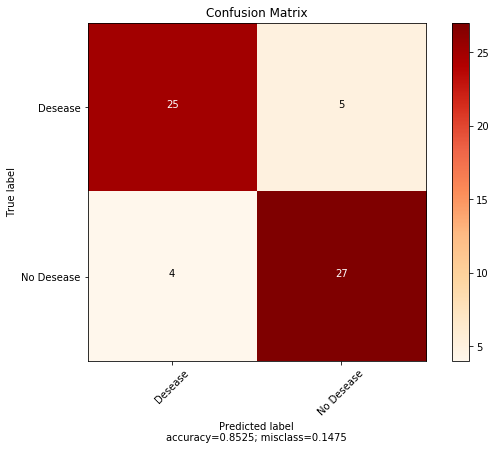

In [334]:
plot_confusion_matrix(cm = confusion_matrix(model3.predict(testXX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

In [335]:
print model3.coefs_

[array([[-1.68798975e-01,  2.87428997e-01, -5.62183132e-01,
         1.87502434e-02, -2.31331278e-01],
       [-4.77137206e-01, -2.01251910e-01,  1.50040109e-01,
         1.51653472e-01,  4.15181324e-01],
       [-2.22111721e-02,  1.43921169e-01, -3.48547270e-01,
         2.20295693e-01, -7.47735208e-01],
       [ 1.56192171e-01, -3.03380485e-02,  7.84138723e-02,
        -8.21714636e-02, -2.47312397e-01],
       [ 3.13016958e-01,  5.37857756e-01,  9.33488639e-03,
         2.97877307e-01,  4.10312101e-01],
       [ 4.37695402e-01, -5.94078034e-01, -5.41029885e-01,
        -3.44437418e-01,  2.48017313e-01],
       [-4.44047193e-01, -1.48328327e-01,  4.18665686e-01,
        -6.46107051e-01, -3.35900298e-04],
       [-1.24443680e-01,  2.45595793e-01,  3.84122690e-01,
        -5.27662264e-01,  4.43206957e-01],
       [ 5.06596998e-01,  3.01355289e-01, -4.14631171e-02,
         1.65553301e-01, -3.28965764e-01],
       [-7.54216632e-02,  4.99776790e-01, -3.32124861e-01,
        -4.81592944e-0

In [336]:
network = Sequential()
network.add(Dense(5, input_dim=13, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainXX, trainY, epochs=1000)

scoreT = network.evaluate(testXX, testY)
scoreE = network.evaluate(trainXX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)

Epoch 1/1000
242/242 [==============================] - 1s 4ms/step - loss: 1.9545 - binary_accuracy: 0.4504
Epoch 2/1000
242/242 [==============================] - 0s 153us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 3/1000
242/242 [==============================] - 0s 118us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 4/1000
242/242 [==============================] - 0s 106us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 5/1000
242/242 [==============================] - 0s 158us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 6/1000
242/242 [==============================] - 0s 84us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 7/1000
242/242 [==============================] - 0s 220us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 8/1000
242/242 [==============================] - 0s 114us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 9/1000
242/242 [==============================] - 0s 157us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoc

242/242 [==============================] - 0s 124us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 75/1000
242/242 [==============================] - 0s 94us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 76/1000
242/242 [==============================] - 0s 79us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 77/1000
242/242 [==============================] - 0s 69us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 78/1000
242/242 [==============================] - 0s 100us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 79/1000
242/242 [==============================] - 0s 89us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 80/1000
242/242 [==============================] - 0s 101us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 81/1000
242/242 [==============================] - 0s 89us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 82/1000
242/242 [==============================] - 0s 112us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 83/10

242/242 [==============================] - 0s 73us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 148/1000
242/242 [==============================] - 0s 63us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 149/1000
242/242 [==============================] - 0s 73us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 150/1000
242/242 [==============================] - 0s 61us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 151/1000
242/242 [==============================] - 0s 76us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 152/1000
242/242 [==============================] - 0s 91us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 153/1000
242/242 [==============================] - 0s 81us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 154/1000
242/242 [==============================] - 0s 86us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 155/1000
242/242 [==============================] - 0s 67us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 1

242/242 [==============================] - 0s 74us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 220/1000
242/242 [==============================] - 0s 109us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 221/1000
242/242 [==============================] - 0s 77us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 222/1000
242/242 [==============================] - 0s 87us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 223/1000
242/242 [==============================] - 0s 93us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 224/1000
242/242 [==============================] - 0s 78us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 225/1000
242/242 [==============================] - 0s 89us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 226/1000
242/242 [==============================] - 0s 66us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 227/1000
242/242 [==============================] - 0s 86us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 

242/242 [==============================] - 0s 86us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 292/1000
242/242 [==============================] - 0s 66us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 293/1000
242/242 [==============================] - 0s 68us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 294/1000
242/242 [==============================] - 0s 76us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 295/1000
242/242 [==============================] - 0s 83us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 296/1000
242/242 [==============================] - 0s 154us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 297/1000
242/242 [==============================] - 0s 158us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 298/1000
242/242 [==============================] - 0s 119us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 299/1000
242/242 [==============================] - 0s 125us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epo

242/242 [==============================] - 0s 109us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 365/1000
242/242 [==============================] - 0s 97us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 366/1000
242/242 [==============================] - 0s 87us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 367/1000
242/242 [==============================] - 0s 75us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 368/1000
242/242 [==============================] - 0s 65us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 369/1000
242/242 [==============================] - 0s 97us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 370/1000
242/242 [==============================] - 0s 76us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 371/1000
242/242 [==============================] - 0s 60us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 372/1000
242/242 [==============================] - 0s 72us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 

242/242 [==============================] - 0s 66us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 437/1000
242/242 [==============================] - 0s 72us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 438/1000
242/242 [==============================] - 0s 61us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 439/1000
242/242 [==============================] - 0s 86us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 440/1000
242/242 [==============================] - 0s 99us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 441/1000
242/242 [==============================] - 0s 82us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 442/1000
242/242 [==============================] - 0s 76us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 443/1000
242/242 [==============================] - 0s 82us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 444/1000
242/242 [==============================] - 0s 78us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 4

242/242 [==============================] - 0s 68us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 509/1000
242/242 [==============================] - 0s 88us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 510/1000
242/242 [==============================] - 0s 80us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 511/1000
242/242 [==============================] - 0s 93us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 512/1000
242/242 [==============================] - 0s 78us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 513/1000
242/242 [==============================] - 0s 77us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 514/1000
242/242 [==============================] - 0s 77us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 515/1000
242/242 [==============================] - 0s 79us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 516/1000
242/242 [==============================] - 0s 90us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 5

242/242 [==============================] - 0s 69us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 581/1000
242/242 [==============================] - 0s 58us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 582/1000
242/242 [==============================] - 0s 67us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 583/1000
242/242 [==============================] - 0s 66us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 584/1000
242/242 [==============================] - 0s 112us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 585/1000
242/242 [==============================] - 0s 79us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 586/1000
242/242 [==============================] - 0s 70us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 587/1000
242/242 [==============================] - 0s 71us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 588/1000
242/242 [==============================] - 0s 71us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 

242/242 [==============================] - 0s 68us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 654/1000
242/242 [==============================] - 0s 74us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 655/1000
242/242 [==============================] - 0s 75us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 656/1000
242/242 [==============================] - 0s 87us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 657/1000
242/242 [==============================] - 0s 65us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 658/1000
242/242 [==============================] - 0s 71us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 659/1000
242/242 [==============================] - 0s 76us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 660/1000
242/242 [==============================] - 0s 80us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 661/1000
242/242 [==============================] - 0s 81us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 6

242/242 [==============================] - 0s 89us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 727/1000
242/242 [==============================] - 0s 80us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 728/1000
242/242 [==============================] - 0s 73us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 729/1000
242/242 [==============================] - 0s 102us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 730/1000
242/242 [==============================] - 0s 65us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 731/1000
242/242 [==============================] - 0s 100us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 732/1000
242/242 [==============================] - 0s 78us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 733/1000
242/242 [==============================] - 0s 80us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 734/1000
242/242 [==============================] - 0s 73us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch

242/242 [==============================] - 0s 100us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 800/1000
242/242 [==============================] - 0s 64us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 801/1000
242/242 [==============================] - 0s 122us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 802/1000
242/242 [==============================] - 0s 76us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 803/1000
242/242 [==============================] - 0s 83us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 804/1000
242/242 [==============================] - ETA: 0s - loss: 1.6094 - binary_accuracy: 0.437 - 0s 67us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 805/1000
242/242 [==============================] - 0s 75us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 806/1000
242/242 [==============================] - 0s 75us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 807/1000
242/242 [==============================] - 0s 81us/s

242/242 [==============================] - 0s 81us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 872/1000
242/242 [==============================] - 0s 91us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 873/1000
242/242 [==============================] - 0s 73us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 874/1000
242/242 [==============================] - 0s 87us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 875/1000
242/242 [==============================] - 0s 84us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 876/1000
242/242 [==============================] - 0s 80us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 877/1000
242/242 [==============================] - 0s 88us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 878/1000
242/242 [==============================] - 0s 91us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 879/1000
242/242 [==============================] - 0s 70us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 8

242/242 [==============================] - 0s 75us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 945/1000
242/242 [==============================] - 0s 75us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 946/1000
242/242 [==============================] - 0s 70us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 947/1000
242/242 [==============================] - 0s 71us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 948/1000
242/242 [==============================] - 0s 82us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 949/1000
242/242 [==============================] - 0s 69us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 950/1000
242/242 [==============================] - 0s 69us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 951/1000
242/242 [==============================] - 0s 77us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 952/1000
242/242 [==============================] - 0s 73us/step - loss: 1.6094 - binary_accuracy: 0.4504
Epoch 9

In [337]:
network.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_75 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_76 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_77 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_78 (Dense)             (None, 5)                 30        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [305]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[-0.10228328,  0.08488818, -0.11014523, -0.29258206,  0.31031784],
       [-0.12959962, -0.17883942, -0.01061202,  0.41219142, -0.286668  ],
       [-0.10960896, -0.03768016, -0.46178427, -0.17283528, -0.25413975],
       [-0.46681613,  0.17105402,  0.3368646 ,  0.26249266,  0.09072192],
       [ 0.522146  , -0.28632468, -0.04617622,  0.42552012, -0.22247577],
       [-0.0054984 , -0.43874347, -0.2850306 ,  0.34910357,  0.33734134],
       [-0.33084375, -0.4995797 , -0.16937244,  0.50859827,  0.1801598 ],
       [ 0.32935786, -0.3462006 ,  0.24330518,  0.11257295,  0.2461339 ],
       [ 0.25145918, -0.50442296, -0.32646886,  0.05439822, -0.44075093],
       [-0.17910667, -0.40847364,  0.10603322,  0.50183827, -0.41110632],
       [-0.0853285 ,  0.12001011, -0.39752254, -0.47937477, -0.40638325],
       [-0.22125879,  0.2802722 , -0.35482064,  0.14203507, -0.21812323],
       [-0.5420496 , -0.4547675 , -0.03293283,  0.5218879 ,  0.11983978]],
      dtype=float32), array([-0.0002

<h2>Interpretación</h2>

# Comparación de los modelos 

# Conclusiones